## Lab1 : Potential Function
___


### Import Dependencies

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


### Configuration          
- **PATH_TO_IMAGE** : &nbsp; &nbsp; &nbsp; directory path to the map
- **START** : &nbsp; &nbsp; &nbsp; starting position [x,y]
- **GOAL** :  &nbsp; &nbsp; &nbsp; goal position [x,y]
- **Q**: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; parameter of repulsive function
- **WAVEFRONT_TYPE** : 
    - 0 for "4-connectivity"
    - 1 for "8-connectivity"
    - 2 for "euclidean"
- **BUSHFIRE_TYPE** : 
    - 0 for "4-connectivity"
    - 1 for "8-connectivity"
    - 2 for "euclidean"

In [68]:
PATH_TO_IMAGE = './data/map0.png'
START = [10,10]
GOAL = [90,70]
Q = 3
WAVEFRONT_TYPE = 2
BUSHFIRE_TYPE = 2

## Wavefront Class

In [69]:
class WaveFrontAlgo():
    def __init__(self) -> None:
        pass

    def isnotOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
            
    def isValid(self,index, map):
        if self.isnotOutofBound(index,map):
            if map[index[0],index[1]] == 1: # Check Obstacle
                return False
            else: # apart from value 1 is valid
                return True
        else:
            return False
                        
    
    
    def wavefront_planner(self, map:np.array, goal:list, connection_type):
        """
        Create attraction function from Wavefront 
        """
        if connection_type == "4-connectivity":
            motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right
        else:
            motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, Diagonals
        value = 2        
        # manually assign goal value in map 
        map[goal[0],goal[1]] = value 
        queue = [goal]

        # Start Wavefront loop 
        while queue:
            new_queue = []
            
            for p in queue:
                current_value = map[p[0],p[1]]
                for m in motions:
                    if self.isValid([p[0]+m[0],p[1]+m[1]], map):
                        if connection_type == "euclidean":
                            distance = (m[0]**2+m[1]**2)**0.5
                        else:
                            distance = 1
                        old_value = map[p[0]+m[0],p[1]+m[1]]
                        new_value = current_value + distance
                        if old_value > new_value or old_value == 0: 
                            map[p[0]+m[0],p[1]+m[1]] =  new_value
                            new_queue.append([p[0]+m[0],p[1]+m[1]])
                        
                        
                        
                    
            queue = new_queue
            #print(grid_map)

        final_map = map
        return final_map
      

                            

## BrushFire Class

In [70]:
class BrushFireAlgo():
    def __init__(self) -> None:
        pass
    
    def isnotOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
        
    def isValid(self,index, map):
        if self.isnotOutofBound(index,map):
            if map[index[0],index[1]] == 1: # Check Obstacle
                return False
            else: # apart from value 1 is valid
                return True
        else:
            return False
                        

    
    def brushfire(self, map:np.array, connection_type):
        """
        Create Brushfire function 
        """
        if connection_type == "4-connectivity":
            motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right
        else:
            motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, Diagonals
        obstacle_value = 1
        x,y = np.where(map == obstacle_value)
        queue = []
        for i in range(len(x)-1):
            queue.append([x[i],y[i]]) 
        while queue:
            new_queue = []
            for p in queue:
                current_value = map[p[0],p[1]]
                for m in motions:
                    if self.isValid([p[0]+m[0],p[1]+m[1]],map):
                        if connection_type == "euclidean":
                            distance = (m[0]**2+m[1]**2)**0.5
                        else:
                            distance = 1
                        old_value = map[p[0]+m[0],p[1]+m[1]]
                        new_value = current_value + distance
                        if new_value < old_value or old_value ==0 :
                            map[p[0]+m[0],p[1]+m[1]] =  new_value
                            new_queue.append([p[0]+m[0],p[1]+m[1]])
                
        
            queue = new_queue

        return map
                        
    def repulsive_function(self,grid_map:np.array, q:float):
        """
        Create repulsive function with Q threshold 
        """
        for i in range(grid_map.shape[0]):
                for j in range(grid_map.shape[1]):
                    if grid_map[i,j] == 1:
                        pass
                    elif grid_map[i,j] <= q:
                        grid_map[i,j] = 4*((1/grid_map[i,j]) - (1/q))**2
                    else:
                        grid_map[i,j] = 0

                    
        return grid_map
                 

## PathFinder Class

In [71]:
class PathFinder():  
    def __init__(self) -> None:
        pass

    def isnotOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
      
        
    def find_the_path(self,map:np.array, start:list):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals

        queue = [start[0] , start[1]]
        path = [start]
        while queue:
            new_queue = []
            current_value = map[queue[0],queue[1]]  
            
            value_list = []
            index_list = []
            for m in motions:
                neighbor_index = [queue[0]+m[0],queue[1]+m[1]] 
                
                if self.isnotOutofBound(neighbor_index, map):
                    neighbor_value = map[neighbor_index[0],neighbor_index[1]]
                    if neighbor_value < current_value:
                        value_list.append(neighbor_value)
                        index_list.append(neighbor_index)

            if index_list:
                selected_index = index_list[np.argmin(value_list)] #choose the lowest value as a path
                new_queue = selected_index
                path.append(selected_index)
                           
            queue = new_queue
        return path
    
    def find_lcoal_minimum(self,map:np.array):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals
        local_min_list = []
        for i in range(map.shape[0]):
            for j in range(map.shape[1]):
                value = map[i, j] 
                if value < map.max() -0.00001: 
                    for m in motions:
                        is_local_min = True
                        n_index = [i+m[0],j+m[1]] 
                        if self.isnotOutofBound(n_index, map):
                            n_value = map[n_index[0],n_index[1]]
                            if n_value < map.max()-0.00001:  #not obstacle
                                if n_value < value  :
                                    is_local_min = False
                                    break
                    
                    if is_local_min:
                        local_min_list.append([i,j])

        return local_min_list                      

## Main Code

### Loading Configuration

In [72]:
image_path = PATH_TO_IMAGE
start = START
goal = GOAL

PF = PathFinder()

WF = WaveFrontAlgo()
wf_config_list = ["4-connectivity","8-connectivity","euclidean"]
wf_connection_type = wf_config_list[WAVEFRONT_TYPE]

BF = BrushFireAlgo()
q = Q
bf_config_list = ["4-connectivity","8-connectivity","euclidean"]
bf_connection_type = bf_config_list[BUSHFIRE_TYPE]

### Prepare Grid Map Data 

* Load grid map from image file

In [73]:
image = Image.open(image_path).convert('L')
grid_map = np.array(image.getdata()).reshape(image.size[0],image.size[1])/255

* Binarize the image into proper format

In [74]:
grid_map[grid_map > 0.5] = 1
grid_map[grid_map <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map = (grid_map * -1) + 1

* Show grid map 


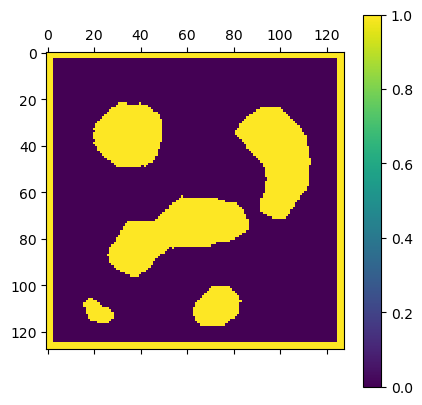

In [75]:
plt.matshow(grid_map)
plt.colorbar()
plt.show()

### Attractive Function

* find the attractive function using Wavefront Algorithm

In [76]:
attractive_fx = WF.wavefront_planner(grid_map.copy(),goal,wf_connection_type)

* normalize the data and visualization

In [77]:
attractive_fx_normalized = attractive_fx.copy()

max = attractive_fx_normalized.max() 
min = attractive_fx_normalized.min() 

attractive_fx_normalized[attractive_fx_normalized == 1]= max + 1 # Change the obstacle to the max value 
max = attractive_fx_normalized.max() 
attractive_fx_normalized= (attractive_fx_normalized- min)/ (max) # Normalize to 0.0-1.0 which obstacle is 1
        


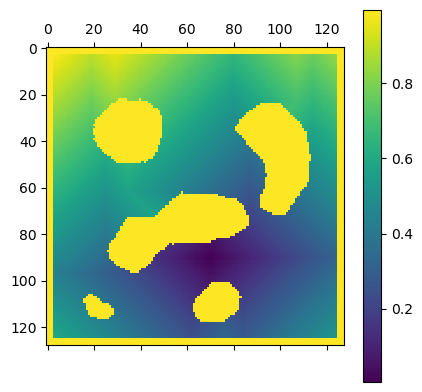

In [78]:
plt.matshow(attractive_fx_normalized)
plt.colorbar()
plt.show()

* Find the path (only attractive function)

In [79]:
path = PF.find_the_path(attractive_fx_normalized,start)    

print(path)
print("Path Distance: {}".format(len(path)))


[[10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [16, 16], [17, 17], [18, 18], [19, 19], [20, 19], [21, 19], [22, 19], [23, 19], [24, 19], [25, 19], [26, 19], [27, 19], [28, 19], [29, 19], [30, 19], [31, 19], [32, 19], [33, 19], [34, 19], [35, 19], [36, 19], [37, 19], [38, 19], [39, 19], [40, 20], [41, 21], [42, 21], [43, 22], [44, 23], [45, 24], [46, 25], [47, 25], [48, 25], [49, 25], [50, 25], [51, 25], [52, 25], [53, 25], [54, 25], [55, 25], [56, 25], [57, 25], [58, 25], [59, 25], [60, 25], [61, 25], [62, 25], [63, 25], [64, 25], [65, 25], [66, 25], [67, 25], [68, 25], [69, 25], [70, 25], [71, 25], [72, 25], [73, 25], [74, 25], [75, 25], [76, 25], [77, 25], [78, 25], [79, 25], [80, 25], [81, 25], [82, 25], [83, 25], [84, 25], [85, 25], [86, 25], [87, 25], [88, 26], [89, 26], [90, 26], [91, 27], [92, 28], [93, 29], [94, 30], [95, 31], [96, 32], [97, 33], [97, 34], [97, 35], [97, 36], [97, 37], [97, 38], [97, 39], [96, 40], [95, 41], [95, 42], [94, 43], [93, 44], [92, 45],

- Visualize the path

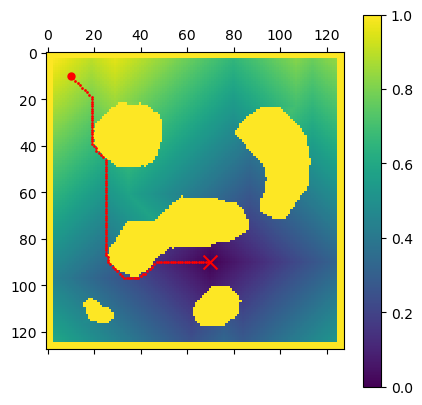

In [80]:

plt.matshow(attractive_fx_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

path_np = np.array(path)
x,y = path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')


plt.colorbar()
plt.show()



## Repulsive Function

* Generate bushfire array from obstacle

In [81]:
bushfire_fx = BF.brushfire(grid_map.copy(),bf_connection_type)

- Visualize the Bushfire function

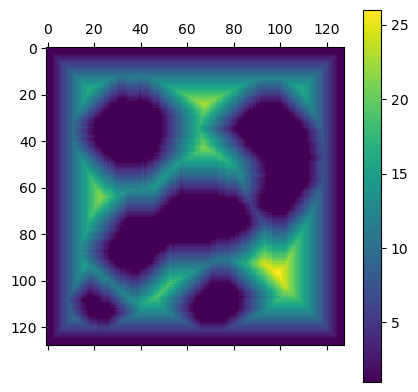

In [82]:
plt.matshow(bushfire_fx)
plt.colorbar()
plt.show()

- Generate repulsive function from bushfire array

In [83]:
repulsive_fx = BF.repulsive_function(bushfire_fx.copy(),q)

- Visualize Repulsive Function

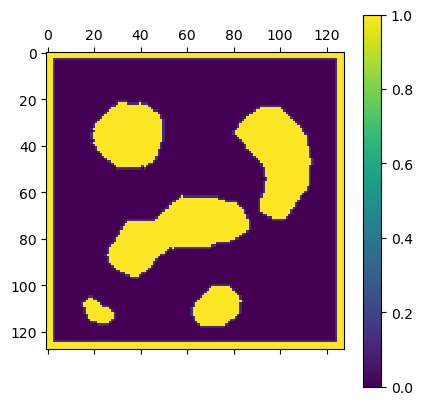

In [84]:
plt.matshow(repulsive_fx)
plt.colorbar()
plt.show()

## Attractive + Repulsive Function

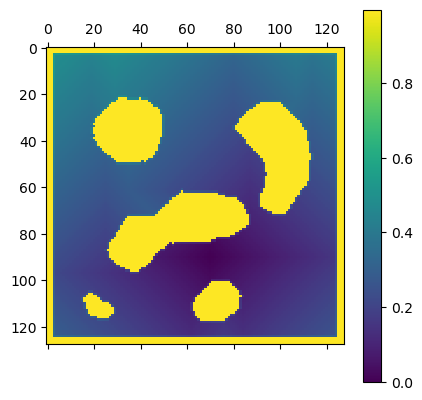

In [85]:
combined_map = attractive_fx_normalized + repulsive_fx
combined_map_normalized = combined_map.copy()
max = combined_map_normalized.max() 
min = combined_map_normalized.min()
combined_map_normalized = (combined_map_normalized - min)/ (max)
        
plt.matshow(combined_map_normalized)
plt.colorbar()
plt.show()

- find the final path of combined map

In [86]:
final_path = PF.find_the_path(combined_map_normalized,start)    


print(final_path)
print("Path Distance: {}".format(len(final_path)))

[[10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [16, 16], [17, 17], [18, 18], [19, 19], [20, 19], [21, 19], [22, 19], [23, 19], [24, 19], [25, 19], [26, 19], [27, 19], [28, 19], [29, 19], [30, 19], [31, 19], [32, 19]]
Path Distance: 23


- Visualize the path 

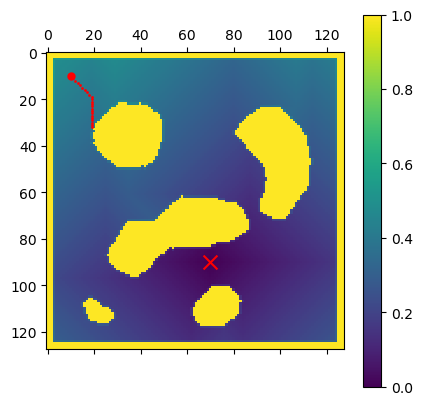

In [87]:

plt.matshow(combined_map_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

final_path_np = np.array(final_path)
x,y = final_path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')



plt.colorbar()
plt.show()




- find local minimum (reprsent in small black dot)

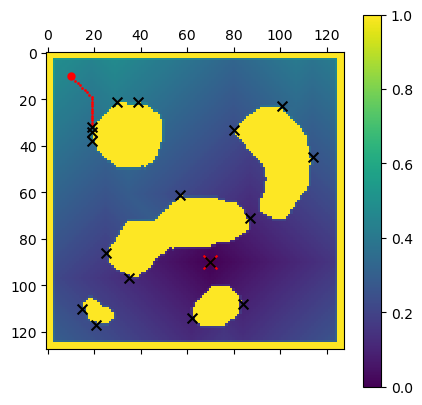

Local minimum points:[[21, 30], [21, 39], [23, 101], [32, 19], [33, 80], [34, 19], [38, 19], [45, 114], [61, 57], [71, 87], [86, 25], [90, 70], [97, 35], [108, 84], [110, 15], [114, 62], [117, 21]]


In [88]:
plt.matshow(combined_map_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

final_path_np = np.array(final_path)
x,y = final_path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')

loc_min = PF.find_lcoal_minimum(combined_map_normalized)
local_np = np.array(loc_min)
x,y = local_np.T
Drawing_loc_min = plt.scatter(y,x,s=50,c='black',marker='x')


plt.colorbar()
plt.show()

print("Local minimum points:{}".format(loc_min))
